Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 1s 7ms/step - loss: 0.4965 - val_loss: 0.3821
Epoch 2/500
158/158 [==============================] - 0s 970us/step - loss: 0.3890 - val_loss: 0.2500
Epoch 3/500
158/158 [==============================] - 0s 1ms/step - loss: 0.2156 - val_loss: 0.0926
Epoch 4/500
158/158 [==============================] - 0s 925us/step - loss: 0.0845 - val_loss: 0.0537
Epoch 5/500
158/158 [==============================] - 0s 995us/step - loss: 0.0659 - val_loss: 0.0675
Epoch 6/500
158/158 [==============================] - 0s 893us/step - loss: 0.0466 - val_loss: 0.0385
Epoch 7/500
158/158 [==============================] - 0s 932us/step - loss: 0.0366 - val_loss: 0.0320
Epoch 8/500
158/158 [==============================] - 0s 975us/step - loss: 0.0384 - val_loss: 0.0291
Epoch 9/500
158/158 [==============================] - 0s 1ms/step - loss: 0.0304 - val_loss: 0.0321
Epoch 10/500
158/158 [============

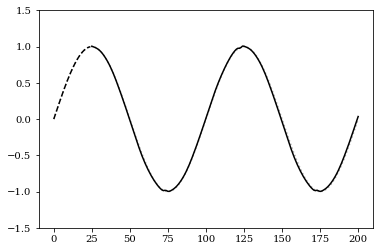

In [67]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)


def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)


def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    #return sin(x) + noise
    return sin(x)


'''
データの生成
'''
T = 100
f = toy_problem(T)

length_of_sequences = 2 * T
maxlen = 25  # ひとつの時系列データの長さ

data = []
target = []

for i in range(0, length_of_sequences - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])

X = np.array(data).reshape(len(data), maxlen, 1)
Y = np.array(target).reshape(len(data), 1)

# データ設定
N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X, Y, test_size=N_validation)


'''
モデル設定
'''
n_in = len(X[0][0])  # 1
n_hidden = 20
n_out = len(Y[0])  # 1


def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model = Sequential()
model.add(SimpleRNN(n_hidden,
                    kernel_initializer=weight_variable,
                    input_shape=(maxlen, n_in)))
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('linear'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error',
              optimizer=optimizer)

'''
モデル学習
'''
epochs = 500
batch_size = 10

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_validation, Y_validation),
          callbacks=[early_stopping])
#model.save('rnn_example3.h5')
'''
出力を用いて予測
'''
truncate = maxlen
Z = X[:1]  # 元データの最初の一部だけ切り出し

original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

d = []

for i in range(length_of_sequences - maxlen + 1):
    z_ = Z[-1:]
    y_ = model.predict(z_)
    sequence_ = np.concatenate(
        (z_.reshape(maxlen, n_in)[1:], y_),
        axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

'''
グラフで可視化
'''
plt.rc('font', family='serif')
plt.figure()
plt.ylim([-1.5, 1.5])
plt.plot(toy_problem(T, ampl=0), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.plot(predicted, color='black')
plt.show()

In [68]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)


def sin(x, T=4):
    return np.sin(2.0 * np.pi * x / T)


def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    #return sin(x) + noise
    return sin(x)


'''
データの生成
'''
T = 4
f = toy_problem(T)

#length_of_sequences = 2 * T
length_of_sequences = 5
maxlen = 4  # ひとつの時系列データの長さ

data = []
target = []

for i in range(0, length_of_sequences - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])
print('data:')
print(data)
print('target:')
print(target)

X = np.array(data).reshape(len(data), maxlen, 1)
Y = np.array(target).reshape(len(data), 1)
print('X:')
print(X)
print('Y')
print(Y)

# データ設定
N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train
print('N_train')
print(N_train)
print('N_validation')
print(N_validation)

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X, Y, test_size=N_validation)
print('X_train')
print(X_train)
print('X_validation')
print(X_validation)
print('Y_train')
print(Y_train)
print('Y_validation')
print(Y_validation)

'''
モデル設定
'''
n_in = len(X[0][0])  # 1
n_hidden = 20
n_out = len(Y[0])  # 1
print('n_in')
print(n_in)
print('n_out')
print(n_out)

def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)

print('============================================')

Z = X[:1]  # 元データの最初の一部だけ切り出し
print('Z')
print(Z)

original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]
print('original')
print(original)
print('predicted')
print(predicted)

#model = load_model('rnn_example3.h5')

for i in range(length_of_sequences - maxlen + 1):
    z_ = Z[-1:]
    print('z_')
    print(z_)


data:
[array([ 0.0000000e+00,  1.0000000e+00,  1.2246468e-16, -1.0000000e+00]), array([ 1.0000000e+00,  1.2246468e-16, -1.0000000e+00, -2.4492936e-16])]
target:
[-2.4492935982947064e-16, 1.0]
X:
[[[ 0.0000000e+00]
  [ 1.0000000e+00]
  [ 1.2246468e-16]
  [-1.0000000e+00]]

 [[ 1.0000000e+00]
  [ 1.2246468e-16]
  [-1.0000000e+00]
  [-2.4492936e-16]]]
Y
[[-2.4492936e-16]
 [ 1.0000000e+00]]
N_train
1
N_validation
1
X_train
[[[ 0.0000000e+00]
  [ 1.0000000e+00]
  [ 1.2246468e-16]
  [-1.0000000e+00]]]
X_validation
[[[ 1.0000000e+00]
  [ 1.2246468e-16]
  [-1.0000000e+00]
  [-2.4492936e-16]]]
Y_train
[[-2.4492936e-16]]
Y_validation
[[1.]]
n_in
1
n_out
1
Z
[[[ 0.0000000e+00]
  [ 1.0000000e+00]
  [ 1.2246468e-16]
  [-1.0000000e+00]]]
original
[0.0, 1.0, 1.2246467991473532e-16, -1.0]
predicted
[None, None, None, None]
z_
[[[ 0.0000000e+00]
  [ 1.0000000e+00]
  [ 1.2246468e-16]
  [-1.0000000e+00]]]
z_
[[[ 0.0000000e+00]
  [ 1.0000000e+00]
  [ 1.2246468e-16]
  [-1.0000000e+00]]]
